In [128]:
#importing the modules that are necessary for the analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [129]:
#loading the dataset into a dataframe
file_path = "C:\\Users\\Gregory Bazuaye\\Downloads\\Project+2+-+Cars+Dataset.csv"
dataset = pd.read_csv(file_path)
dataset

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [130]:
#checking the records that contain null values per column
dataset.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [131]:
#Imputation of the numerical columns 
#After inspection , it was found that the invoice is treated as a categorical column because it is stored as a string
# conversion to a floating type number is mandatory

dataset['Invoice'] = dataset['Invoice'].str.replace('$' ,'').str.replace(',' , '').astype(float)
dataset['Invoice'] = dataset['Invoice'].apply( lambda x : format(x , '.2f')).astype(float)

dataset['MSRP'] = dataset['MSRP'].str.replace('$' , '').str.replace(',' , '').astype(float)
numeric_columns = ['Cylinders', 'MSRP','Invoice', 'EngineSize' ,'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length']

#using mean imputation
for column in numeric_columns :
    dataset[column].fillna(dataset[column].mean() , inplace = True)
dataset.isnull().sum()

C:\Users\Gregory Bazuaye\AppData\Local\Temp\ipykernel_22556\1447623718.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Invoice'] = dataset['Invoice'].str.replace('$' ,'').str.replace(',' , '').astype(float)
C:\Users\Gregory Bazuaye\AppData\Local\Temp\ipykernel_22556\1447623718.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['MSRP'] = dataset['MSRP'].str.replace('$' , '').str.replace(',' , '').astype(float)


Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [132]:
#Imputation of the categorical columns
categorical_columns = ['Make','Model', 'Type', 'Origin', 'DriveTrain']

#using modal imputation
for column in categorical_columns :
        mode = dataset[column].mode()[0]
        dataset[column].fillna(mode , inplace = True)
        

dataset.isnull().sum() # no more fields with null values

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

WRANGLING

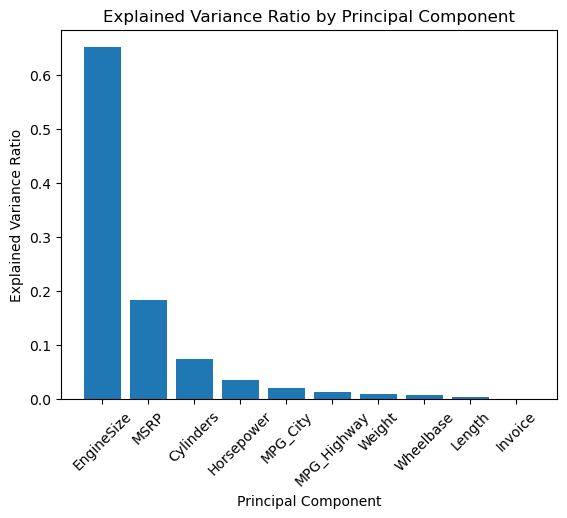

In [153]:


#TO CAPTURE HOW MUCH VARIANCE EACH PRINCIPAL COMPONENT POSSESSES 
# - employment of principal component analysis (PCA) technique

#- extraction of the numerical variables
numeric_columns = ['EngineSize', 'MSRP','Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length' ,'Invoice']
numeric_variables = dataset[numeric_columns]

scaler = StandardScaler()
numeric_variables = scaler.fit_transform(numeric_variables)

pca = PCA ()
principal_components  = pca.fit_transform(numeric_variables)

eva = pca.explained_variance_ratio_

# a plot of the eva
plt.bar(range( 1 , len(eva) + 1) , eva)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, len(eva) + 1), numeric_columns)  
plt.xticks(rotation=45)  # Rotate x-axis labels for better
plt.show()

In [134]:
# from the bar chart we see that the enginesize has the highest explained variance ratio .
#the engine size accounts for the largest amount of variablity of all other components and hence
# the most influential component , this and the most uncorrelated components will be retained
# i'll keep enginesize msrp cylinders , horsepower and mpg city

target_variance = 0.95
component_count = 0
cummulative_variance = 0

for i , variance in enumerate(eva ):
    cummulative_variance += variance
    component_count += 1
    if (cummulative_variance > variance) :
        break
        
print(f' The number of components to explain {target_variance} variance is : {component_count}')

pca = PCA (n_components = component_count)
principal_components = pca.fit_transform(numeric_variables)

pc_data = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(component_count)])

# Concatenate the principal component DataFrame with the original data
final_data = pd.concat([dataset, pc_data], axis=1)

# Display the final data
print(final_data)



 The number of components to explain 0.95 variance is : 2
      Make                    Model   Type  Origin DriveTrain     MSRP  \
0    Acura                      MDX    SUV    Asia        All  36945.0   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820.0   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990.0   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195.0   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755.0   
..     ...                      ...    ...     ...        ...      ...   
427  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565.0   
428  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565.0   
429  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210.0   
430  Volvo                      V40  Wagon  Europe      Front  26135.0   
431  Volvo                     XC70  Wagon  Europe        All  35145.0   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_

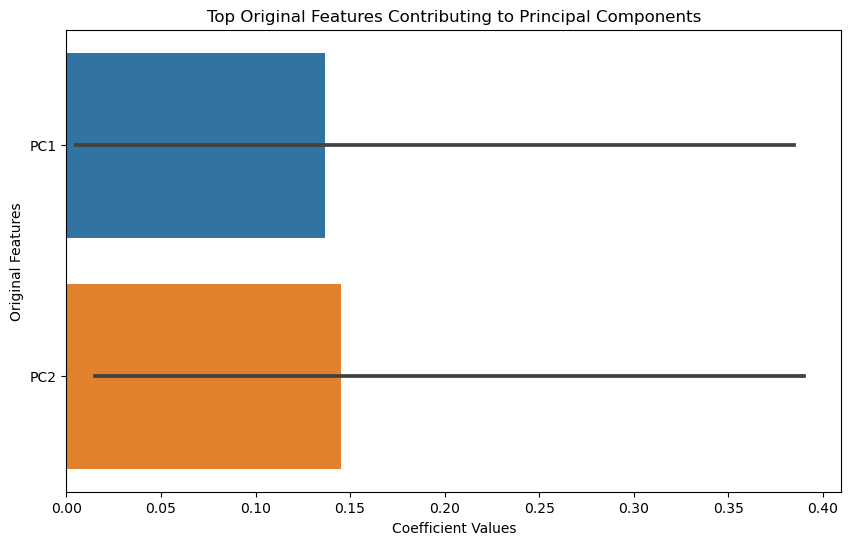

In [71]:
# riginal_features = df.drop(['PC1', 'PC2'], axis=1)  # Extract original features

# Create a PCA model
pca = PCA(n_components=2)
pca.fit(dataset[numeric_columns])

# Reverse transform PCA components

# Calculate coefficients for each PC
coefficients = pca.components_

# Create a DataFrame to store the coefficients
coeff_df = pd.DataFrame(coefficients, columns=dataset[numeric_columns].columns, index=['PC1', 'PC2'])

# Sort coefficients by absolute values
sorted_coeff_df = coeff_df.apply(lambda col: col.abs().sort_values(ascending=False), axis=0)

# Visualize coefficients
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sorted_coeff_df.T.head(10), orient='h')
plt.xlabel('Coefficient Values')
plt.ylabel('Original Features')
plt.title('Top Original Features Contributing to Principal Components')



plt.show()

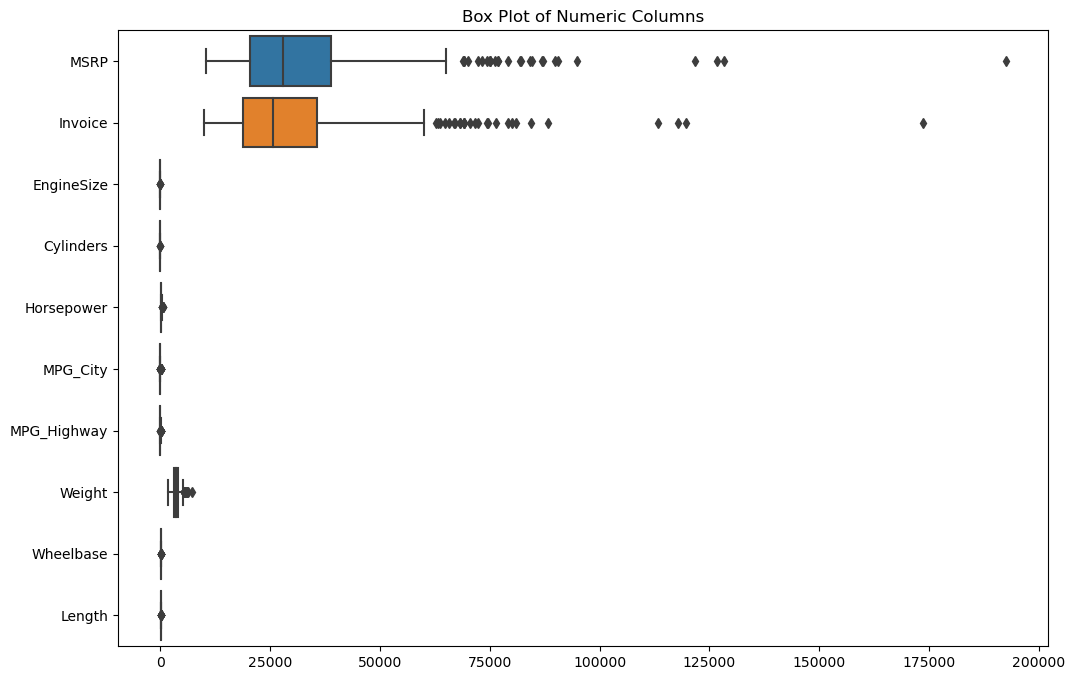

ValueError: Could not interpret value `Index` for parameter `y`

<Figure size 800x600 with 0 Axes>

In [135]:

# Remove non-numeric columns
numeric_data = dataset.select_dtypes(include=[np.number])

# Calculate Z-score
z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

# Calculate IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
inter_quartile_range = Q3 - Q1

# Identify outliers using Z-score and IQR
outliers_z = (z_scores > 3) | (z_scores < -3)
outliers_iqr = (numeric_data < (Q1 - 1.5 * inter_quartile_range)) | (numeric_data> (Q3 + 1.5 * inter_quartile_range))

# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_data, orient='h')
plt.title("Box Plot of Numeric Columns")
plt.show()

# Visualize outliers using scatter plots
for column in numeric_data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='Index', data=numeric_data.reset_index(), hue=outliers_z[column])
    plt.title(f"Scatter Plot of {column} with Z-score Outliers")
    plt.xlabel(column)
    plt.ylabel('Index')
    plt.show()


In [ ]:
# it is very evident msrp and invoice columns have the most significant outliers , they are the same because the contain the 
#.. same values . Truncation could be employed but is not really necessary

ANALYSIS

In [136]:
 #Finding the price difference for each model
dataset['Price difference'] = dataset['MSRP'] - dataset['Invoice']
zero_price_difference =dataset[dataset['Price difference']== 0 ]
row_difference = dataset.shape[0] - zero_price_difference.shape[0]

print(row_difference)
dataset

432


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Price difference
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,3608.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,2059.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,2343.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,2896.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,4741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0,2362.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0,2482.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0,2637.0
430,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0,1494.0


In [137]:
#finding the brand with the highest price differences on average
temp = dataset.copy()
grouped = temp.groupby('Make')['Price difference'].mean()
grouped = pd.DataFrame(grouped)
grouped


,Price difference
Make,
Acura,4347.714286
Audi,3977.789474
BMW,3664.600000
Buick,2682.888889
Cadillac,4047.500000
Chevrolet,2526.222222
Chrysler,1981.933333
Dodge,2093.769231
Ford,2062.869565


In [139]:
max_price_ind = grouped['Price difference'].idxmax()
max_price_diff = grouped.loc[max_price_ind]
max_price_diff = pd.DataFrame(max_price_diff)
print(f'The brand with the highest price difference is : ')
print(max_price_diff)

The brand with the highest price difference is : 
                      Porsche
Price difference  9902.142857


Text(0, 0.5, 'Price difference')

<Figure size 1000x800 with 0 Axes>

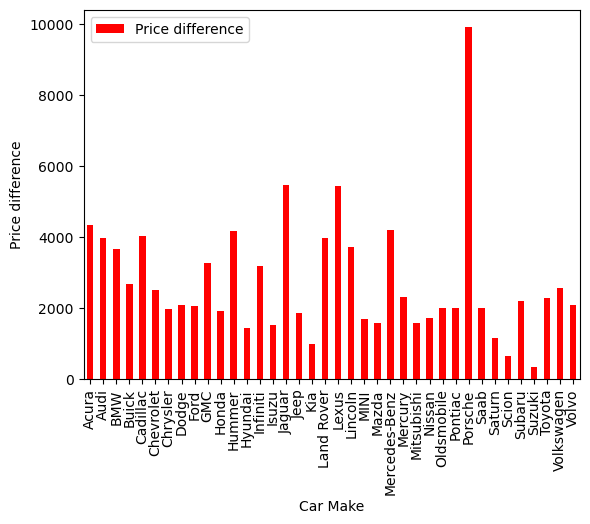

In [140]:
#a visualisation of te price difference between brands

plt.figure(figsize = (10 ,8))
grouped.plot(kind= 'bar' ,color ='red')
plt.xlabel('Car Make')
plt.ylabel('Price difference')

In [ ]:
# Given that porsche has the highest price difference we can say
# - The prices leave a bigger window for negotiation
#- possess the biggest reputation out of all the brands listed
#- could possibly make the most profit from car sales

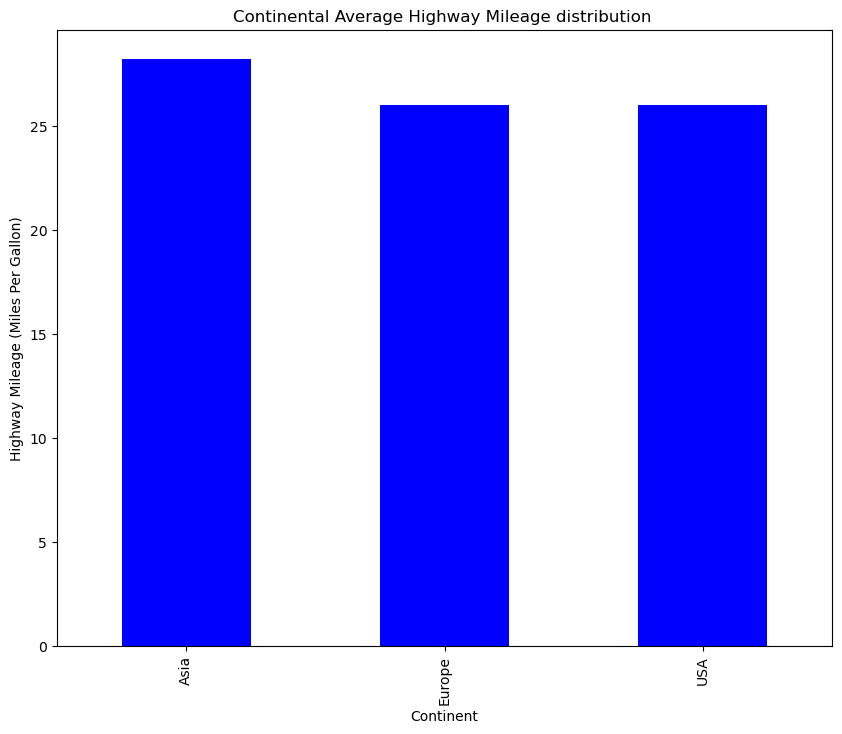

 Standard deviation for (Asia) is 6.6895339203471185
 Standard deviation for (Europe) is 4.1675875298553375
 Standard deviation for (USA) is 5.396582371771295


In [152]:
#finding the contient with the most fuel efficeint cars


origin_grouped  = dataset.groupby('Origin')['MPG_Highway'].mean()
#asia
asia = dataset[dataset['Origin'] == 'Asia']
asia_mpg_dev = asia['MPG_Highway'].std()

#usa
usa = dataset[dataset['Origin'] == 'USA']
usa_mpg_dev = usa['MPG_Highway'].std()

#europe
europe= dataset[dataset['Origin'] == 'Europe']
europe_mpg_dev = europe['MPG_Highway'].std()

plt.figure( figsize = (10  ,8))
origin_grouped.plot( kind ='bar' , color ='blue')
plt.title('Continental Average Highway Mileage distribution ')
plt.xlabel('Continent')
plt.ylabel('Highway Mileage (Miles Per Gallon)')
plt.show()



continents = ['Asia' , 'Europe' ,'USA']
dev_list = [asia_mpg_dev , europe_mpg_dev , usa_mpg_dev]
for i in range (len(continents)) :
    print(f' Standard deviation for ({continents[i]}) is {dev_list[i]}')

In [ ]:
# As a result of their standard deviations not being far apart
# One could conclude that thas Asia has the most fuel economic cars of the 3

In [ ]:
POST  ANALYSIS

In [ ]:
#- The numerical columns that have a very low explained variance factor will be dropped
#-  The MSRP , Engine size , Cylinders and HorsePower will be used for the model creation
# - The algorithm used forthe clustering will be the k-means clustering algorithm

MODEL CREATION

C:\Users\Gregory Bazuaye\.anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gregory Bazuaye\.anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Gregory Bazuaye\.anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gregory Bazuaye\.anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

Text(0.5, 1.0, 'The elbow method')

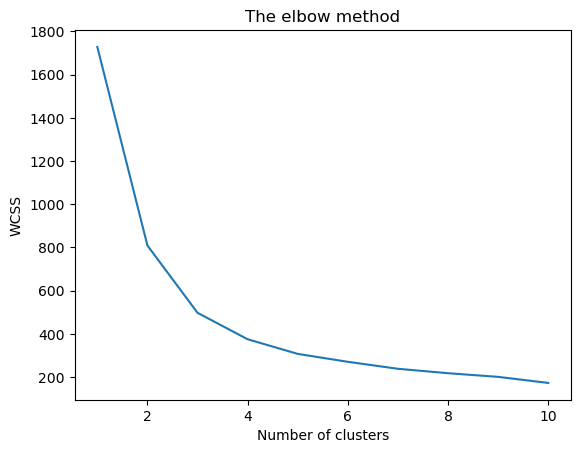

In [94]:
from sklearn.cluster import KMeans
clustered_columns = ['EngineSize' , 'MSRP' , 'Cylinders','Horsepower']
clustering_data = dataset[clustered_columns]
scaled_data = scaler.fit_transform(clustering_data)

#finding the ideal amount of clusters using the elbow method

wcss = []

for i in range ( 1, 11) :
    kmeans = KMeans(n_clusters = i , init ='k-means++' , random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
#plotting the wcss against number of clusters
plt.plot( range(1,11) , wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method')

In [168]:
#from the plot we can choose 4 as our number of clusteers
from sklearn.cluster import KMeans

means = KMeans(n_clusters=4, random_state=42)
clustered_df['Market Group'] = means.fit_predict(scaled_data)

num_clusters = 4
print(clustered_df['Market Group'].value_counts())


C:\Users\Gregory Bazuaye\.anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gregory Bazuaye\.anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0    196
3    135
2     94
1      7
Name: Market Group, dtype: int64


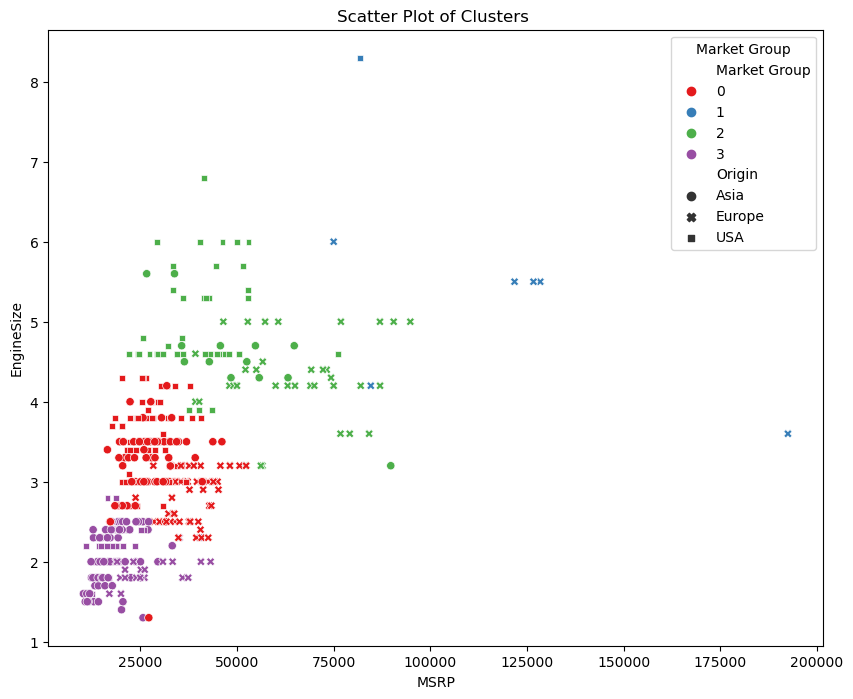

Cluster 1:
Total Samples: 196
Average MSRP: $30095.40
Average EngineSize: 3.22

Cluster 2:
Total Samples: 7
Average MSRP: $115817.14
Average EngineSize: 5.51

Cluster 3:
Total Samples: 94
Average MSRP: $51390.47
Average EngineSize: 4.62

Cluster 4:
Total Samples: 135
Average MSRP: $19397.15
Average EngineSize: 2.05



In [169]:
#scatterplot to visualise each cluster
#plt.figure(figsize = (10,8))
#sns.scatterplot(x ='MSRP' , y ='EngineSize' , hue = 'Market Group' , data = clustered_df , palette ='Set1' )
#plt.title('Scatter Plot of Clusters')
#plt.xlabel('MSRP')
#plt.ylabel('EngineSize')
#plt.show()


plt.figure(figsize=(10, 8))
sns.scatterplot(x='MSRP', y='EngineSize', hue='Market Group', style='Origin', data=clustered_df, palette='Set1')
plt.title('Scatter Plot of Clusters ')
plt.xlabel('MSRP')
plt.ylabel('EngineSize')
plt.legend(title='Market Group')
plt.show()
for cluster_id in range(num_clusters):
    cluster_data = clustered_df[clustered_df['Market Group'] == cluster_id]
    cluster_description = f'Cluster {cluster_id + 1}:\n'
    cluster_description += f'Total Samples: {len(cluster_data)}\n'
    cluster_description += f"Average MSRP: ${cluster_data['MSRP'].mean():.2f}\n"
    cluster_description += f"Average EngineSize: {cluster_data['EngineSize'].mean():.2f}\n"

    print(cluster_description)